<a href="https://colab.research.google.com/github/Aleena24/CV_lab/blob/main/lab4_Linear_Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [4]:
image = cv2.imread("/content/drive/MyDrive/research_dataset/BSD100/148089.png")

# Noisy Image

In [5]:
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image)



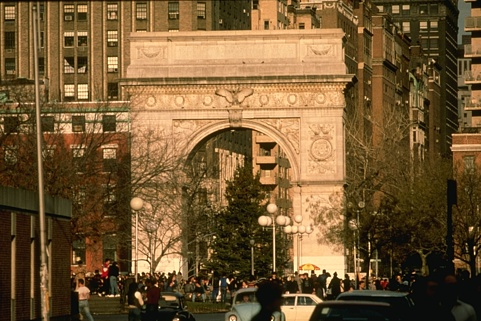

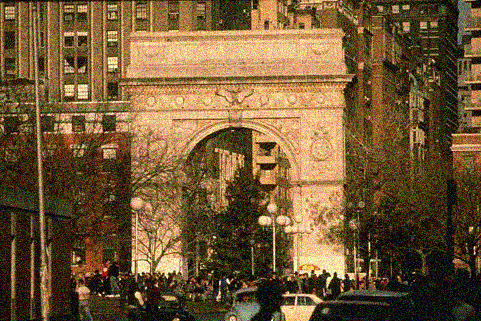

In [6]:
cv2_imshow(image)
cv2_imshow(noisy_image)

# Built-in function


# Average Filter

In [7]:
kernel_size = (5, 5)  # Adjust this size as needed

# Perform average filtering
averaged_image = cv2.blur(image, kernel_size)


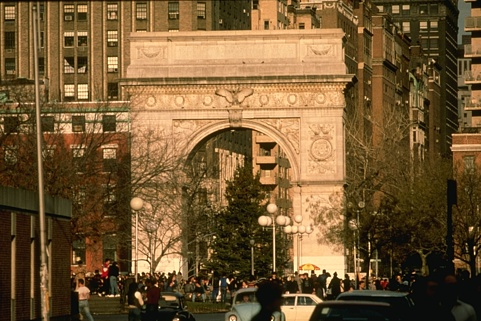

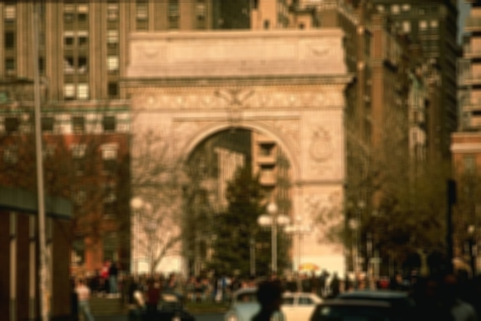

In [8]:
cv2_imshow(image)
cv2_imshow(averaged_image)

# Gaussian Blur

In [9]:
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # You can adjust the kernel size (e.g., (5, 5)) and standard deviation (e.g., 0) as needed


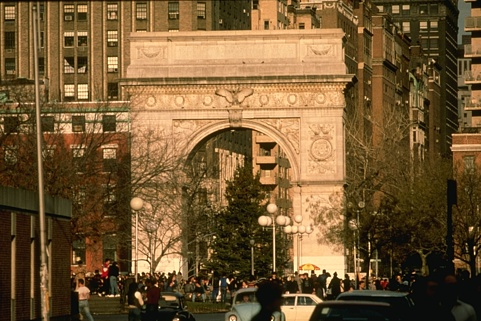

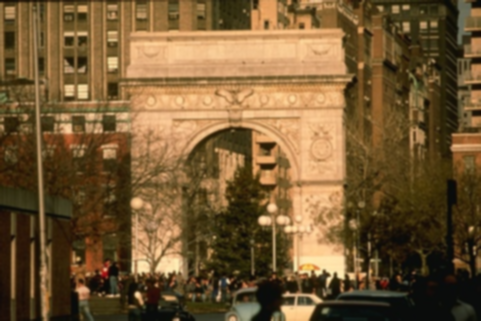

In [10]:
cv2_imshow(image)
cv2_imshow(blurred_image)

# Sharpening Filtering

In [11]:
# Define the sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

# Apply the sharpening kernel to the image
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

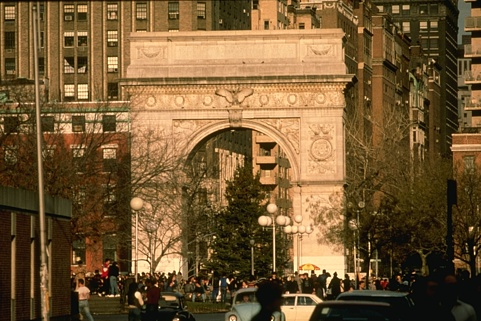

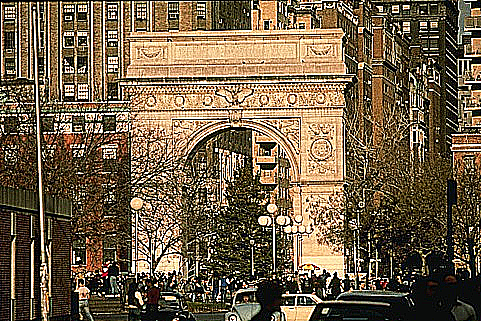

In [12]:
cv2_imshow(image)
cv2_imshow(sharpened_image)

# User defined function

In [21]:
img = cv2.imread('/content/drive/MyDrive/research_dataset/BSD100/304074.png')

def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = img.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = img + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Average Filter

In [37]:
def average_filter(img, kernel_size=3):
    row, col, ch = img.shape
    filtered_img = np.zeros((row, col, ch), dtype=np.uint8)
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            filtered_img[i-pad_size, j-pad_size] = np.mean(roi, axis=(0, 1))
    return filtered_img

In [40]:
noisy_image = add_gaussian_noise(img)
filtered_img = average_filter(noisy_image)

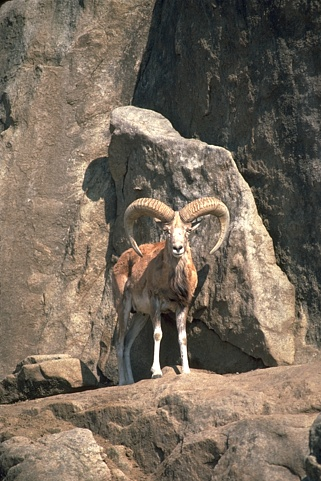

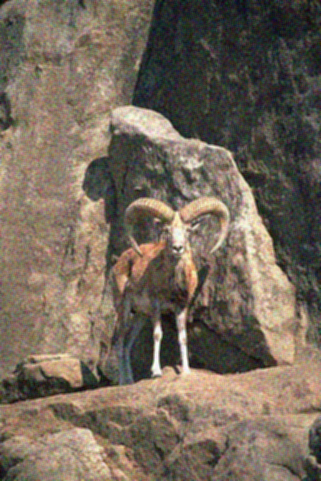

In [41]:
cv2_imshow(img)
cv2_imshow(filtered_img)

# Gaussian Blur

In [45]:
def gaussian_blur(img, kernel_size=20, sigma=0):
    row, col, ch = img.shape
    filtered_img = np.zeros((row, col, ch), dtype=np.uint8)
    pad_size = kernel_size // 2
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - pad_size
            y = j - pad_size
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1, :]
            for c in range(ch):
                filtered_img[i-pad_size, j-pad_size, c] = np.sum(roi[:,:,c] * kernel)
    return filtered_img

In [46]:
gaussian_blurred_img = gaussian_blur(img, kernel_size=5, sigma=1)

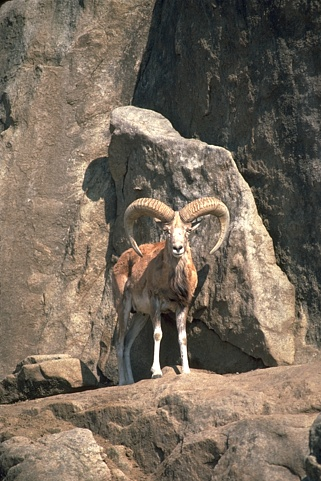

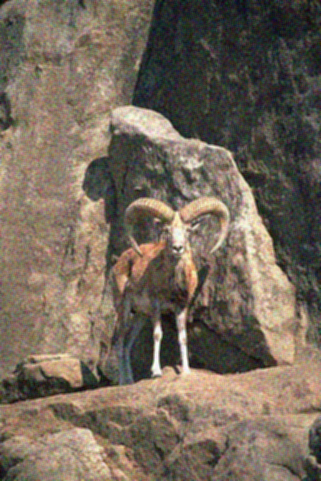

In [48]:
cv2_imshow(img)
cv2_imshow(filtered_img)

# Sharpening Filtering

In [49]:
def sharpening_filter(img):
    row, col = img.shape[:2]
    filtered_img = np.zeros_like(img, dtype=np.float32)
    pad_size = 1
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_img[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            for c in range(img.shape[2]):
                filtered_img[i-pad_size, j-pad_size, c] = np.sum(roi[:,:,c] * kernel)
    return np.clip(filtered_img, 0, 255).astype(np.uint8)


In [51]:
sharp_filter_img = sharpening_filter(img)

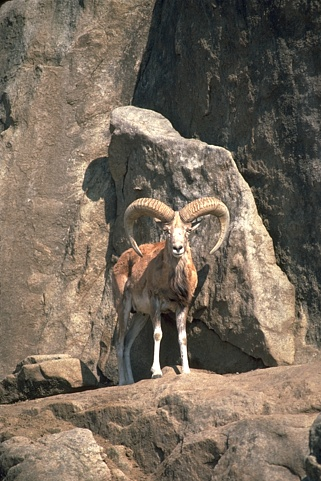

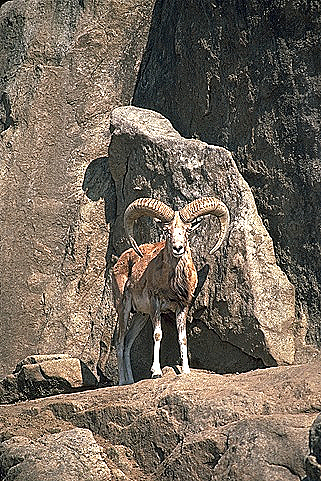

In [53]:
cv2_imshow(img)
cv2_imshow(sharp_filter_img)